<a href="https://www.kaggle.com/code/samithsachidanandan/basic-eda-road-accident-data?scriptVersionId=229813504" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing the libraries 

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# Importing the Data

In [2]:
path = '/kaggle/input/road-accident-dataset/Road Accident Data.xlsx'

df= pd.read_excel(path)

# Display basic info

In [3]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())


Dataset Shape: (307973, 23)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Day_of_Week                 307973 non-null  object        
 4   Year                        307973 non-null  int64         
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  object        
 8   Latitude                    307973 non-null  float64       
 9   Light_Conditions            307973 non-null  object        
 10  Local_Authority_(District)  307973 non-null  object        
 

# Converting to correct Datatypes

In [4]:
df["Accident Date"] = pd.to_datetime(df["Accident Date"])
categorical_cols = [
    "Month", "Day_of_Week", "Junction_Control", "Junction_Detail", 
    "Accident_Severity", "Light_Conditions", "Local_Authority_(District)",
    "Police_Force", "Road_Surface_Conditions", 
    "Road_Type", "Urban_or_Rural_Area", "Weather_Conditions", "Vehicle_Type"
]
df[categorical_cols] = df[categorical_cols].astype("category")
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M", errors="coerce").dt.time
df["Accident_Index"] = df["Accident_Index"].astype(str)

print(df.dtypes)


Accident_Index                        object
Accident Date                 datetime64[ns]
Month                               category
Day_of_Week                         category
Year                                   int64
Junction_Control                    category
Junction_Detail                     category
Accident_Severity                   category
Latitude                             float64
Light_Conditions                    category
Local_Authority_(District)          category
Carriageway_Hazards                   object
Longitude                            float64
Number_of_Casualties                   int64
Number_of_Vehicles                     int64
Police_Force                        category
Road_Surface_Conditions             category
Road_Type                           category
Speed_limit                            int64
Time                          datetime64[ns]
Urban_or_Rural_Area                 category
Weather_Conditions                  category
Vehicle_Ty

In [5]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Month', 'Day_of_Week', 'Year',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

# Display first few rows

In [6]:
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,NaT,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,NaT,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,NaT,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,NaT,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,NaT,Urban,Fine no high winds,Car


# Display last few rows

In [7]:
print("\nLast 5 Rows:")
df.tail()


Last 5 Rows:


,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,201091NM01760,2022-02-18,Feb,Thursday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,...,2,1,Northern,Dry,Single carriageway,60,NaT,Rural,Fine no high winds,Car
307969,201091NM01881,2022-02-21,Feb,Sunday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,...,1,1,Northern,Frost or ice,Single carriageway,60,NaT,Rural,Fine no high winds,Car
307970,201091NM01935,2022-02-23,Feb,Tuesday,2022,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,...,1,3,Northern,Frost or ice,Single carriageway,30,NaT,Rural,Fine no high winds,Car
307971,201091NM01964,2022-02-23,Feb,Tuesday,2022,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,...,1,2,Northern,Wet or damp,Single carriageway,60,NaT,Rural,Fine no high winds,Motorcycle over 500cc
307972,201091NM02142,2022-02-28,Feb,Sunday,2022,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,...,1,1,Northern,Wet or damp,Dual carriageway,60,NaT,Rural,Snowing no high winds,Car


# Check for missing values

In [8]:

print("\nMissing Values:")
df.isnull().sum()



Missing Values:


Accident_Index                     0
Accident Date                      0
Month                              0
Day_of_Week                        0
Year                               0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                          307973
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

# Removing the Columns with zero values

In [9]:
df.drop(columns=['Carriageway_Hazards', 'Time'], inplace=True)


In [10]:
df.dropna(inplace=True)


# Check unique values in each column

In [11]:


print("\nUnique Values Per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")




Unique Values Per Column:
Accident_Index: 193173 unique values
Accident Date: 730 unique values
Month: 12 unique values
Day_of_Week: 7 unique values
Year: 2 unique values
Junction_Control: 6 unique values
Junction_Detail: 9 unique values
Accident_Severity: 3 unique values
Latitude: 258556 unique values
Light_Conditions: 5 unique values
Local_Authority_(District): 422 unique values
Longitude: 263828 unique values
Number_of_Casualties: 28 unique values
Number_of_Vehicles: 17 unique values
Police_Force: 51 unique values
Road_Surface_Conditions: 5 unique values
Road_Type: 5 unique values
Speed_limit: 8 unique values
Urban_or_Rural_Area: 2 unique values
Weather_Conditions: 8 unique values
Vehicle_Type: 15 unique values


# Summary statistics for numerical columns

In [12]:

print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Accident Date,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,300512,300512.000000,300512.000000,300512.000000,300512.000000,300512.000000,300512.000000
mean,2021-12-24 08:17:29.504845056,2021.469865,52.485568,-1.361957,1.359443,1.830513,38.932921
min,2021-01-01 00:00:00,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021-06-29 00:00:00,2021.000000,51.484873,-2.241664,1.000000,1.000000,30.000000
50%,2021-12-09 00:00:00,2021.000000,52.212485,-1.341222,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,2022.000000,53.416004,-0.203738,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000
std,NaN,0.499092,1.341740,1.354025,0.818268,0.711758,14.062624


# Plotting the Categorical Columns

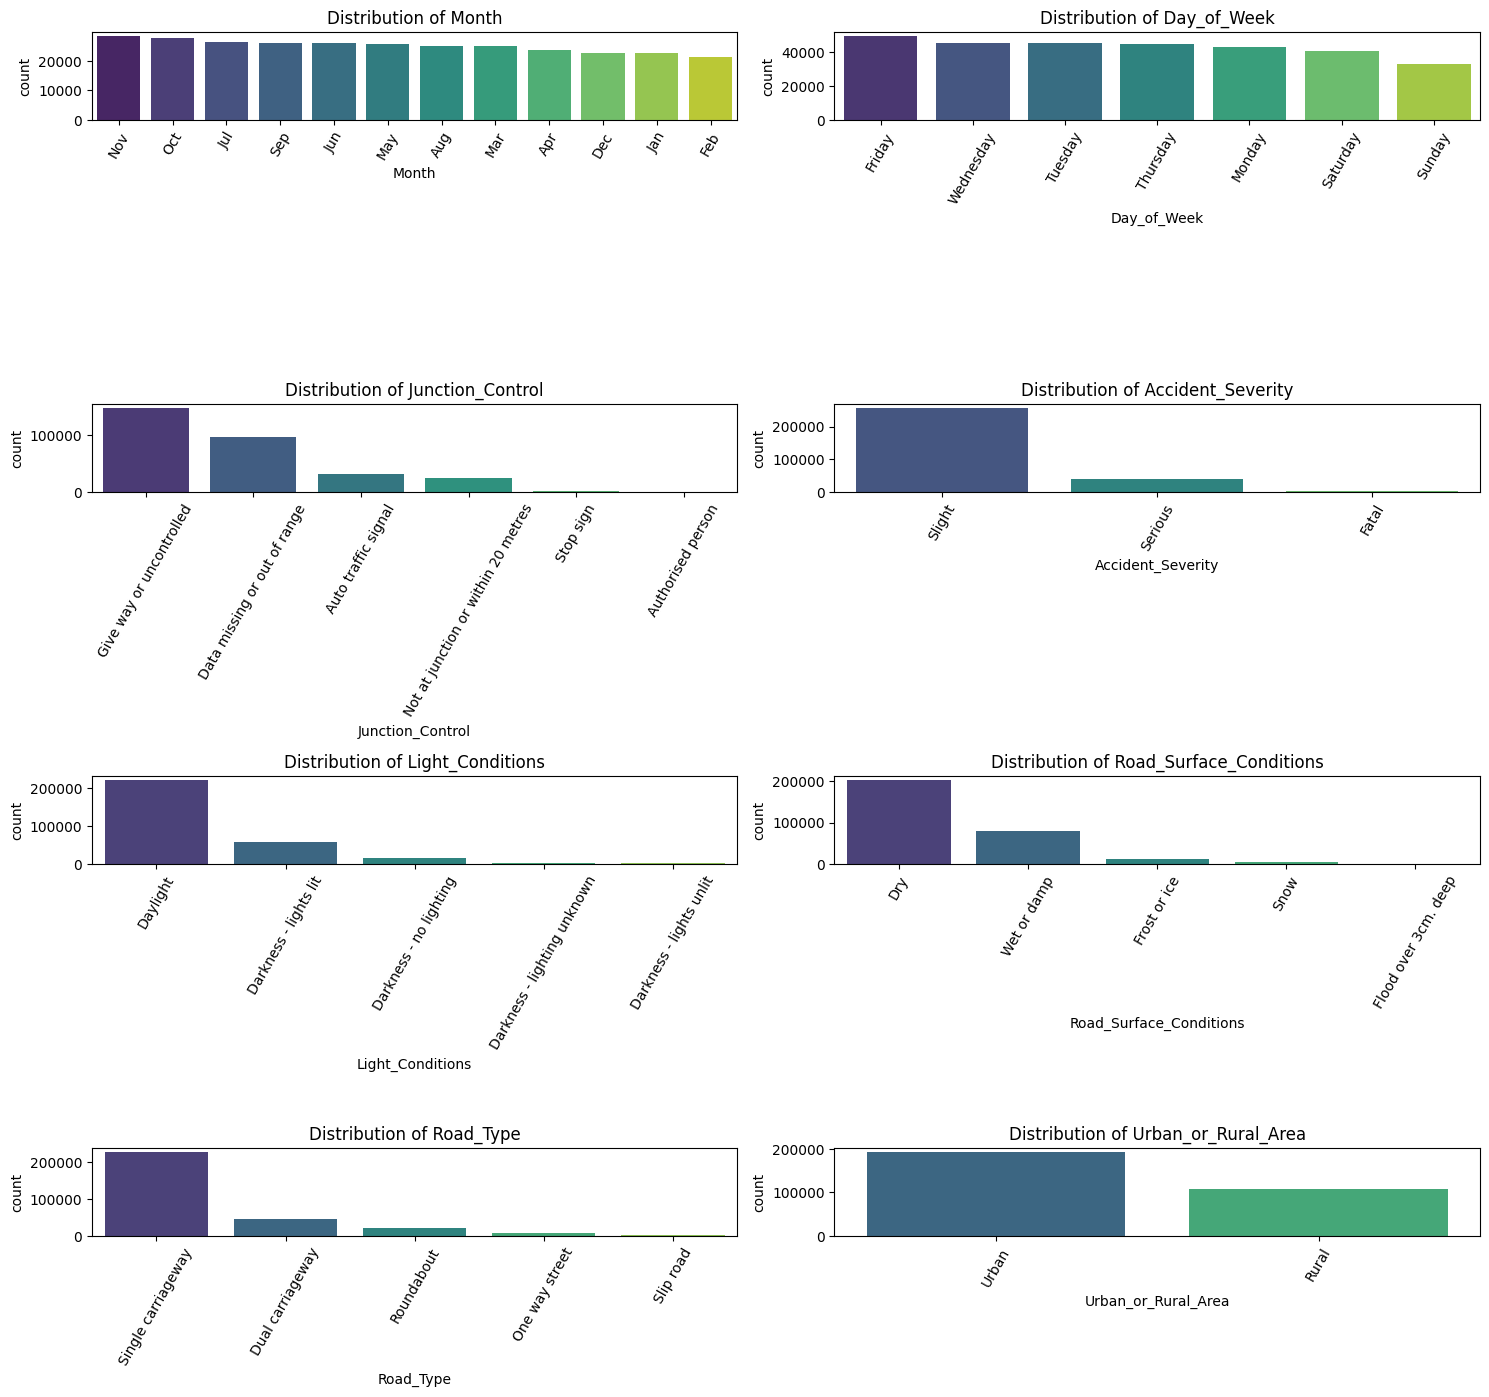

In [13]:
categorical_cols = [
    "Month", "Day_of_Week", "Junction_Control",  
    "Accident_Severity", "Light_Conditions",
    "Road_Surface_Conditions", 
    "Road_Type", "Urban_or_Rural_Area"
]

plt.figure(figsize=(15,20))
for i, col in enumerate(categorical_cols):  
    plt.subplot(6, 2, i + 1)
    
    sns.countplot(x=df[col], palette="viridis", order=df[col].value_counts().index)
    plt.xticks(rotation=60)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


# Plotting the Numerical Columns

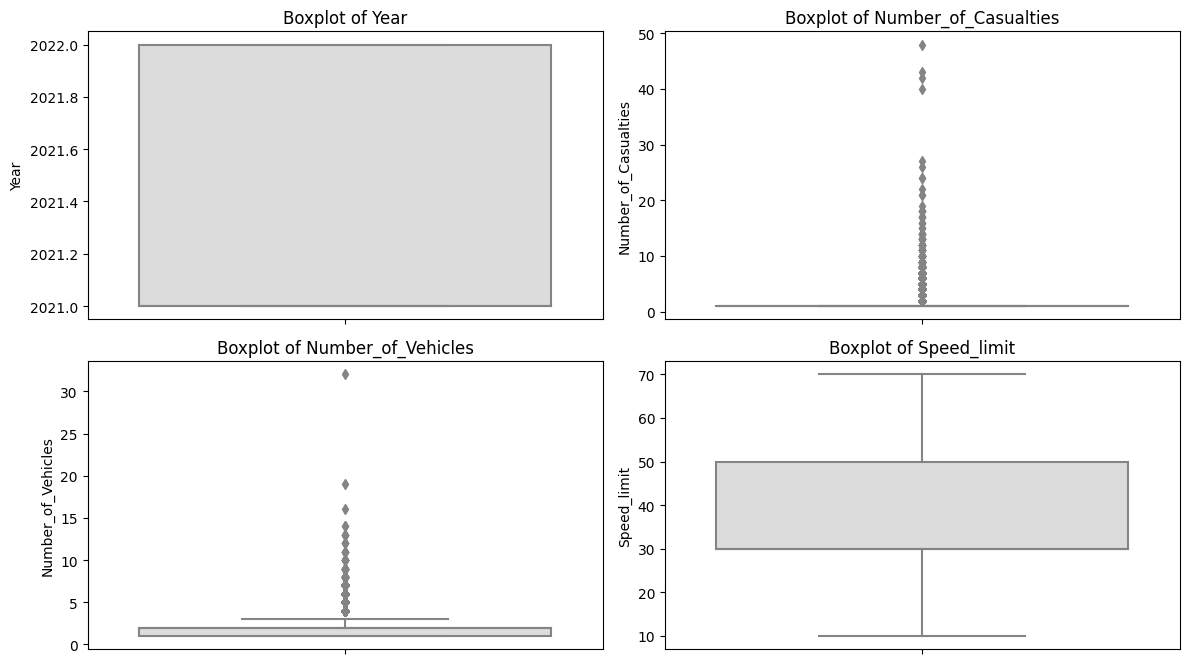

In [14]:
numerical_cols = ["Year", "Number_of_Casualties", "Number_of_Vehicles", "Speed_limit"]

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Plotting the Severity 

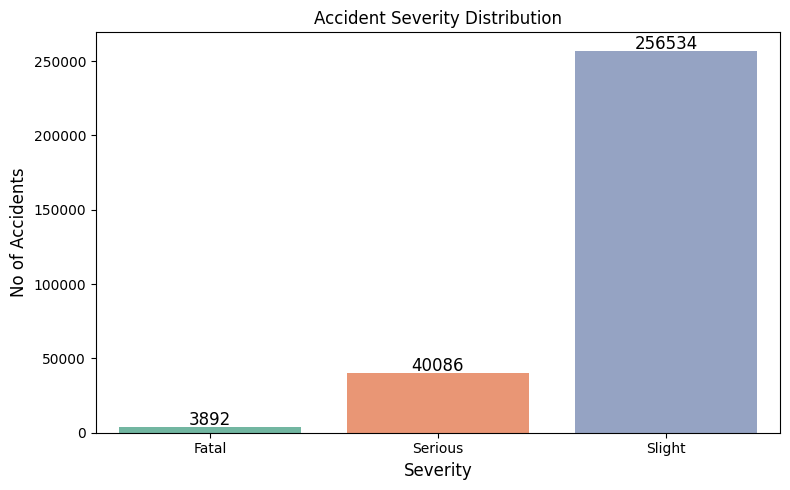

In [15]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["Accident_Severity"], palette="Set2", order=["Fatal", "Serious", "Slight"])
for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
plt.xlabel('Severity', fontsize=12)
plt.ylabel('No of Accidents', fontsize=12)
plt.title("Accident Severity Distribution")
plt.tight_layout()
plt.show()


# Plotting the Light Conditions  

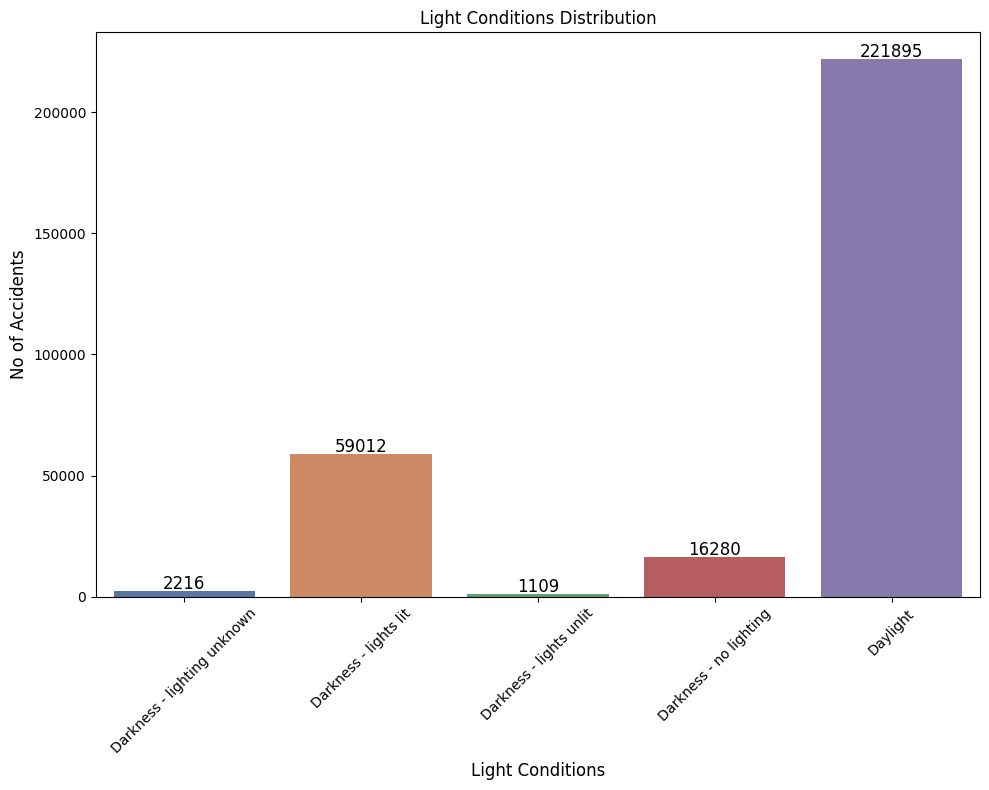

In [16]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=df["Light_Conditions"], palette="deep")
for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
plt.xticks(rotation=45)
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('No of Accidents', fontsize=12)
plt.title("Light Conditions Distribution")
plt.tight_layout()
plt.show()


# Plotting the Road Surface Conditions  

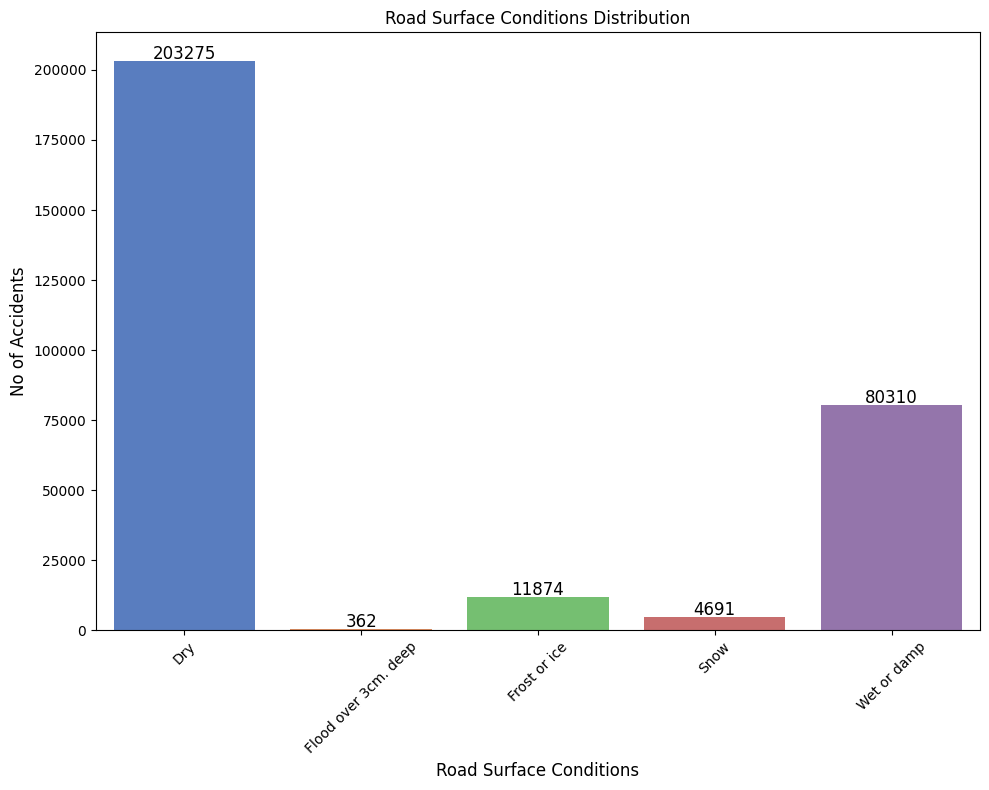

In [17]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=df["Road_Surface_Conditions"], palette="muted")
for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
plt.xticks(rotation=45)
plt.xlabel('Road Surface Conditions', fontsize=12)
plt.ylabel('No of Accidents', fontsize=12)
plt.title("Road Surface Conditions Distribution")
plt.tight_layout()
plt.show()

#                                                      🚀 Thank You 🚀